# Working With Repeated Scan Numbers

This recipe shows how to work with repeated scan numbers.
It uses data from an RFI scan, a trimmed down version.


In this case there are two occurrences of scan 2. 
The two used a different number of channels, so they end up in different binary tables.
We will use 
[summary](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.fits.html#dysh.fits.GBTFITSLoad.summary)
to determine how to uniquely identify them, and then 
[gettp](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.fits.html#dysh.fits.GBTFITSLoad.gettp)
to retrieve the data.  

## Loading Modules
We start by loading the modules we will use for the recipe. 

In [1]:
# These modules are required for the data reduction.
from dysh.fits.gbtfitsload import GBTFITSLoad
from dysh.log import init_logging

# These modules are used for file I/O
from dysh.util.files import dysh_data
from pathlib import Path

## Setup
We start the dysh logging, so we get more information about what is happening.
This is only needed if working on a notebook.
If using the CLI through the ``dysh`` command, then logging is setup for you.

In [2]:
init_logging(2)

# also create a local "output" directory where temporary notebook files can be stored.
output_dir = Path.cwd() / "output"
output_dir.mkdir(exist_ok=True)

## Data Retrieval

Download the example SDFITS data'


In [3]:
filename = dysh_data(example="repeated-scans/data/TRFI_090125_S1.raw.vegas/TRFI_090125_S1.raw.vegas.testtrim.fits")

## Data Loading

Next, we use 
[GBTFITSLoad](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.fits.html#dysh.fits.GBTFITSLoad)
to load the data, and then its 
[summary](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.fits.html#dysh.fits.GBTFITSLoad.summary)
method to inspect its contents.

In [4]:
sdfits = GBTFITSLoad(filename)

In [5]:
sdfits.summary()

SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATION
2,rfiscan1,0.0,Track,1,2.15,2.15,1,1,4,1,15.3022,44.5177
2,rfiscan2,0.0,Track,1,0.75,0.75,1,1,4,1,172.2867,44.5177


The summary tells us there are two instances of scan 2. 
How can we tell them apart?

## Identifying Data

By default `summary` will separate the information by scan number (SCAN), project ID (PROJID) and binary table (BINTABLE).
Since we see there are two occurrences of scan 2, it means one of those columns has different values for each of them.
We can show more columns by using the `add_columns` argument of `summary` to inspect their values.

In [6]:
sdfits.summary(add_columns="BINTABLE, PROJID")

SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATION,BINTABLE,PROJID
2,rfiscan1,0.0,Track,1,2.15,2.15,1,1,4,1,15.3022,44.5177,0,TRFI_090125_S1
2,rfiscan2,0.0,Track,1,0.75,0.75,1,1,4,1,172.2867,44.5177,1,TRFI_090125_S1


This shows that the data have the same project ID, and different binary tables.
We can use the BINTABLE column to uniquely identify the data.
The first occurrence has BINATBLE 0 and the second 1.
It is important to note that the BINTABLE column gets a value depending on the contents of the file at the time of loading, so its value is not absolute.
If you were working with the full data set the BINTABLE values would be different.

## Retrieving Data

Now that we know how to identify the scans we can use this information to retrieve the data we want.
We pass the bintable keyword to 
[gettp](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.fits.html#dysh.fits.GBTFITSLoad.gettp)
to get the data we want.

For the first occurrence of scan 2 we use


In [7]:
tpsb1 = sdfits.gettp(scan=2, ifnum=0, plnum=0, fdnum=0, bintable=0)

For the second occurrence we use

In [8]:
tpsb2 = sdfits.gettp(scan=2, ifnum=0, plnum=0, fdnum=0, bintable=1)

Now we plot the two together to show that they are indeed different.

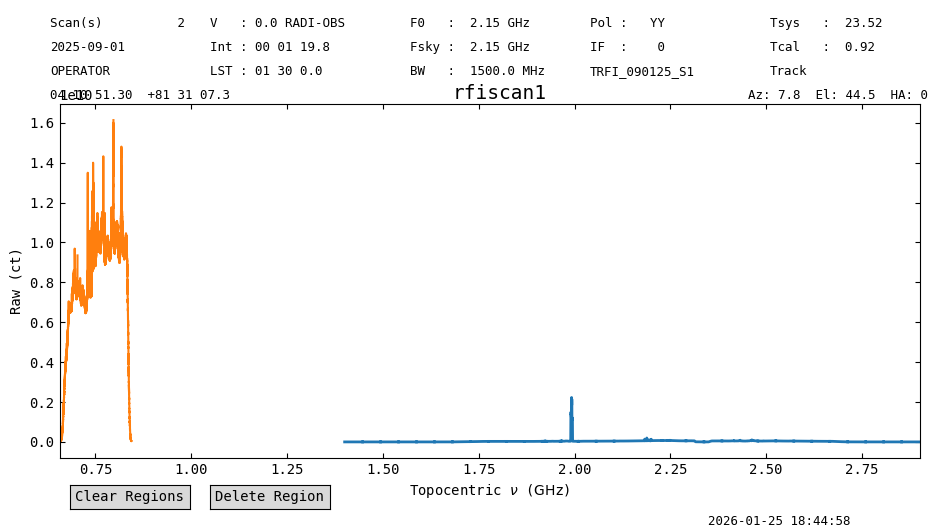

In [9]:
tpsb1_plt = tpsb1.timeaverage().plot(oshow=tpsb2.timeaverage(), xaxis_unit="GHz")

We can clearly see that they have different rest frequencies, though only one can be plotted in the header (as F0)

## Final Stats

Finally, at the end we compute some statistics over a spectrum, merely as a checksum if the notebook is reproducable.



In [10]:
tpsb1.timeaverage().stats()  # rms 81581261.43976656 ct

18:44:58.448 W Warning: 0 != 61: inconsistency counters in mask usage


{'mean': <Quantity 29913581.74412296 ct>,
 'median': <Quantity 26651524.89568543 ct>,
 'rms': <Quantity 81581261.43976656 ct>,
 'min': <Quantity 51849.11344566 ct>,
 'max': <Quantity 2.2269765e+09 ct>,
 'npt': 16384,
 'nan': 61}

In [11]:
tpsb2.timeaverage().stats()  # rms 3.06388519e+09 ct

18:44:58.615 W Warning: 0 != 35: inconsistency counters in mask usage


{'mean': <Quantity 7.89736446e+09 ct>,
 'median': <Quantity 8.85815434e+09 ct>,
 'rms': <Quantity 3.06388519e+09 ct>,
 'min': <Quantity 31972155.95943397 ct>,
 'max': <Quantity 1.61357601e+10 ct>,
 'npt': 131072,
 'nan': 35}